# Question composition

Here we want to investigate the composition of the questions the students are confronted with over time.

In [1]:
# General imports
import sys
sys.path.append("..")

import time
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#DATASET = "assistments09"
#DATASET = "assistments12"
#DATASET = "assistments15"
#DATASET = "assistments17"
#DATASET = "bridge_algebra06"
#DATASET = "algebra05"
#DATASET = "spanish"
DATASET = "statics"

SPLIT = 0.8

### Helper functions

In [3]:
def renumber_attribute(df, attr_name):
    counter = 0
    attr_dict = {}
    overwrite = []
    for e in df[attr_name]:
        if e not in attr_dict:
            attr_dict[e] = counter
            counter += 1
        overwrite.append(attr_dict[e])
    df[attr_name] = np.array(overwrite)   
    return len(attr_dict)


def questions_per_user(df):
    question_counts = defaultdict(int) 
    for i, row in df.iterrows():
        question_counts[row["user_id"]] += 1
    return question_counts


def count_item_split(df, split):
    question_counts = questions_per_user(df)
    
    hits_before_split = defaultdict(int) 
    hits_after_split = defaultdict(int)
    
    current_user = 0
    counter = 0
    assert current_user == df["user_id"][0] 
    for i, row in df.iterrows():
        if current_user != row["user_id"]:
            current_user = row["user_id"]
            counter = 0
        
        counter += 1
        if counter <= split * question_counts[current_user]:
            hits_before_split[row["item_id"]] += 1
        else:
            hits_after_split[row["item_id"]] += 1
        
    return hits_before_split, hits_after_split


def count_skill_split(df, split):
    question_counts = questions_per_user(df)
    hits_before_split = defaultdict(int) 
    hits_after_split = defaultdict(int)
    
    current_user = 0
    counter = 0
    assert current_user == df["user_id"][0] 
    for i, row in df.iterrows():
        if current_user != row["user_id"]:
            current_user = row["user_id"]
            counter = 0
        
        counter += 1
        if counter <= split * question_counts[current_user]:
            hits_before_split[row["skill_id"]] += 1
        else:
            hits_after_split[row["skill_id"]] += 1
        
    return hits_before_split, hits_after_split


def percent_difference_to_presplit(pre, post):
    rel_diffs = {}
    rel_probs = {}

    n_before = 0
    for k in pre:
        n_before += pre[k]

    n_after = 0
    for k in post:
        n_after += post[k]

    n_total = n_before + n_after
    percent_before = n_before / n_total
    percent_after = n_after / n_total
    
    n_only_pre = 0
    for k in pre:
        ad_pre = pre[k] / percent_before
        if k in post:
            ad_post = post[k] / percent_after
            rel_probs[k] = (post[k] / n_after)  / (pre[k] / n_before) 
        else:
            n_only_pre += 1
            ad_post = 0
        ad_total = ad_pre + ad_post
        rel_diffs[k] = (ad_post) / ad_total
        
    n_only_post = 0
    for k in post:
        if k not in pre:
            n_only_post += 1
            rel_diffs[k] = 1
        
    return rel_diffs, rel_probs, n_only_pre, n_only_post
    

## Compute Statistics

### Skill Investigation

In [4]:
data_path = "../data/" + DATASET + "/preprocessed_data.csv" 
df = pd.read_csv(data_path, sep="\t")
num_students = renumber_attribute(df, "user_id")
num_items = renumber_attribute(df, "item_id")
num_skills = renumber_attribute(df, "skill_id")

In [5]:
pre, post = count_item_split(df, SPLIT)
rel_diffs, rel_probs, only_pre, only_post = percent_difference_to_presplit(pre, post)

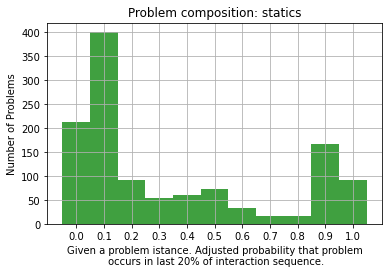

In [6]:
# Visualize problem composition
data = [rel_diffs[k] for k in rel_diffs]
bins = [(0.1 * k - 0.05) for k in range(0,12)]
n, bins, patches = plt.hist(data, bins, density=False, facecolor='g', alpha=0.75)

plt.xlabel('Given a problem istance. Adjusted probability that problem\n occurs in last 20% of interaction sequence.')
plt.ylabel('Number of Problems')
plt.title('Problem composition: ' + DATASET)
plt.gcf().subplots_adjust(bottom=0.18)
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.xticks([0.1 * k for k in range(0, 11)])
plt.grid(True)
plt.savefig("figures_composition/" + DATASET +"_problems.pdf")
plt.show()


In [7]:
print((num_items - only_pre - only_post) / num_items, only_pre / num_items, only_post / num_items)

0.9452166802943581 0.05396565821749796 0.0008176614881439084


In [8]:
### Skill Investigation

In [9]:
pre, post = count_skill_split(df, SPLIT)
rel_diffs, rel_probs, only_pre, only_post = percent_difference_to_presplit(pre, post)

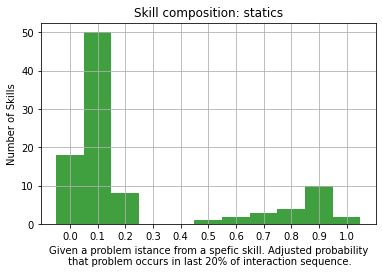

In [10]:
# Visualize skill composition
data = [rel_diffs[k] for k in rel_diffs]
bins = [(0.1 * k - 0.05) for k in range(0,12)]
n, bins, patches = plt.hist(data, bins, density=False, facecolor='g', alpha=0.75)

plt.xlabel('Given a problem istance from a spefic skill. Adjusted probability\n that problem occurs in last 20% of interaction sequence.')
plt.ylabel('Number of Skills')
plt.title('Skill composition: ' + DATASET)
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.gcf().subplots_adjust(bottom=0.18)
plt.xticks([0.1 * k for k in range(0, 11)])
plt.grid(True)
plt.savefig("figures_composition/" + DATASET +"_skills.pdf")
plt.show()


In [11]:
print((num_items - only_pre - only_post) / num_items, only_pre / num_items, only_post / num_items)

1.0 0.0 0.0


## Old

/home/robin/installs/miniconda3/envs/vedu/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


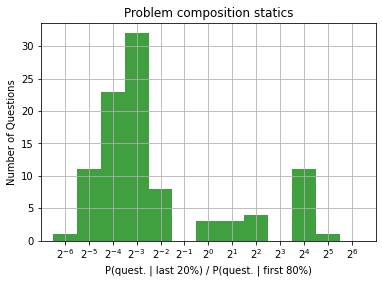

In [12]:
# the histogram of the data
data = [rel_probs[k] for k in rel_probs]

fig, ax = plt.subplots()
bins = [2**(k + 0.5) for k in range(-7,8)]
n, bins, patches = plt.hist(data, bins=bins, density=False, facecolor='g', alpha=0.75)
ax.set_xscale('log', basex=2)
plt.xticks([2**k for k in range(-6,7)])
plt.xlabel('P(quest. | last 20%) / P(quest. | first 80%)')
plt.ylabel('Number of Questions')
plt.title("Problem composition " + DATASET)
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(2**(-7), 2**7)
# plt.ylim(0, 0.03)
plt.grid(True)
[line.set_zorder(3) for line in ax.lines]
plt.show()

In [13]:
num_items


1223